In [ ]:
#libraries import
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [16]:
#load dataset
df = pd.read_csv("data/California_Houses.csv")

In [17]:
#check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [4]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [20]:
#crate new price column then assign the Median_House_Value value
df['Price'] = df['Median_House_Value']
new_df = df.drop('Median_House_Value', axis=1)
new_df.head()

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Price
0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767,452600.0
1,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400,358500.0
2,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450,352100.0
3,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,341300.0
4,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,342200.0


In [25]:
#Features and Target
X = new_df.drop('Price', axis=1)
y = new_df['Price']

In [27]:
#train and test the Features and Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#initialize model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
#Predict target
y_pred = model.predict(X_test)
print(y_pred)

[ 35648.637309   174922.03231575 333310.65975579 ... 424554.60941152
 102940.5403853  190015.15093599]


In [39]:
#Evalute the model fit
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

Mean Squared Error: 4809839606.897736
R2 Score: 0.6329512627916751
Mean Absolute Error: 50404.85523916358


Text(0.5, 1.0, 'Detection of Price Outtliers')

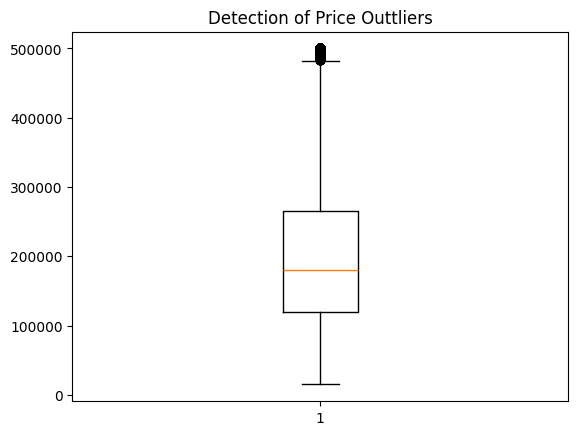

In [36]:
#checking the price column outtliers
plt.boxplot(new_df['Price'])
plt.title("Detection of Price Outtliers")

Text(0, 0.5, 'Predicted Price')

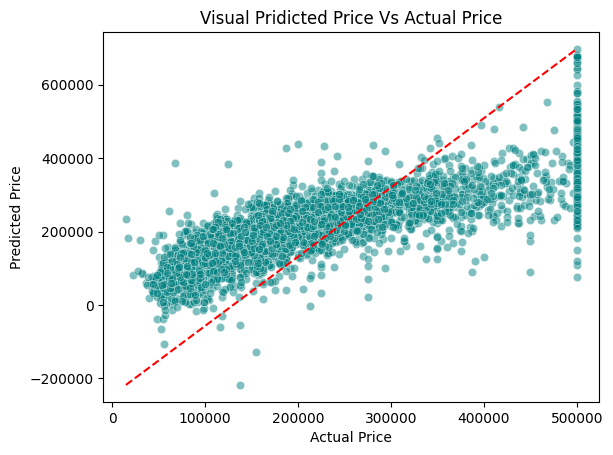

In [42]:
#visulization of the Predicted price
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], "r--")
plt.title("Visual Pridicted Price Vs Actual Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
